In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [130]:
!pip install xgboost

In [16]:
from xgboost import XGBRegressor

Importing the Dataset

In [2]:
df = pd.read_csv('4S4P_Charging_and_Discharging_Normalized.csv')

In [3]:
df.head()

,T0,SOC,Voltage_V,Current_A,C,T1,Charge_or_Discharge
0,1.000000,0.057573,0.338843,0.310342,0.2,0.934638,1
1,0.666667,0.611615,0.628176,0.310342,0.2,0.582159,1
2,0.500000,0.942161,0.993906,0.137919,0.0,0.422739,0
3,0.333333,0.482339,0.609832,0.310342,0.2,0.401226,1
4,0.500000,0.971267,0.997626,0.078381,0.0,0.423606,0


In [4]:
#Checking the number of rows and columns
df.shape
#checking missing values
df.isnull().sum()

T0                     0
SOC                    0
Voltage_V              0
Current_A              0
C                      0
T1                     0
Charge_or_Discharge    0
dtype: int64

In [5]:
df.describe()

,T0,SOC,Voltage_V,Current_A,C,T1,Charge_or_Discharge
count,45500.000000,45500.000000,45500.000000,45500.000000,45500.000000,45500.000000,45500.000000
mean,0.434491,0.548515,0.792887,0.276603,0.194114,0.432715,0.363758
std,0.230300,0.299238,0.245595,0.208296,0.226115,0.172572,0.481086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.292570,0.597054,0.137917,0.000000,0.328723,0.000000
50%,0.333333,0.565602,0.929334,0.224123,0.200000,0.401939,0.000000
75%,0.500000,0.816347,0.997596,0.310342,0.200000,0.474713,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Understanding the correlation between features in the dataset
1. Positive Correlation
2. Negative Correlation

In [6]:
df_corr_matrix = df.corr()

<Axes: >

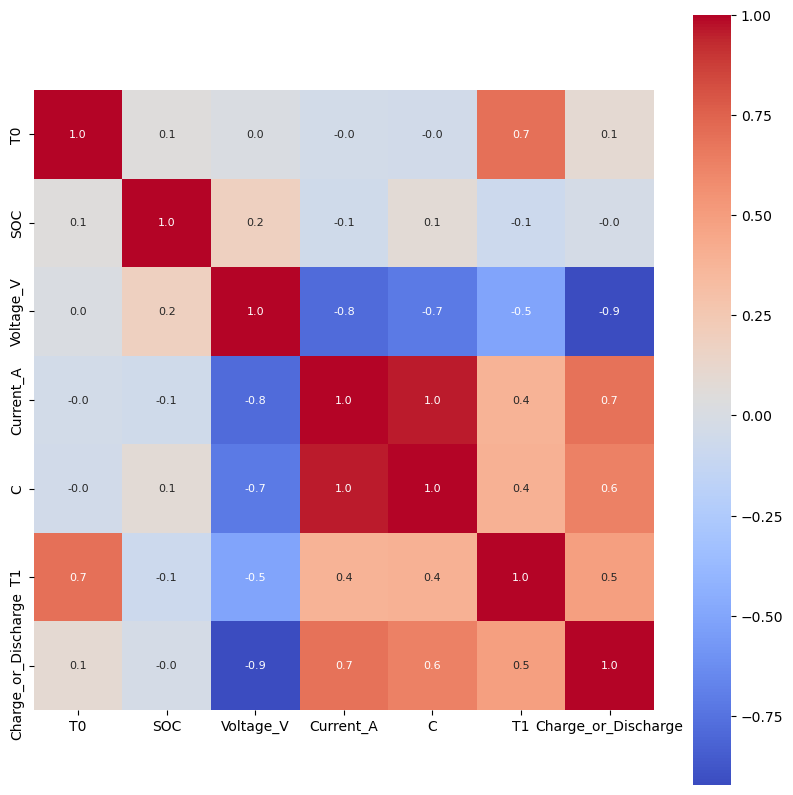

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr_matrix,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')

Splitting the Data and Target

In [8]:
df.head()

,T0,SOC,Voltage_V,Current_A,C,T1,Charge_or_Discharge
0,1.000000,0.057573,0.338843,0.310342,0.2,0.934638,1
1,0.666667,0.611615,0.628176,0.310342,0.2,0.582159,1
2,0.500000,0.942161,0.993906,0.137919,0.0,0.422739,0
3,0.333333,0.482339,0.609832,0.310342,0.2,0.401226,1
4,0.500000,0.971267,0.997626,0.078381,0.0,0.423606,0


In [9]:
X = df.drop(columns=['T1'])
Y = df['T1']

In [10]:
X.head()

,T0,SOC,Voltage_V,Current_A,C,Charge_or_Discharge
0,1.000000,0.057573,0.338843,0.310342,0.2,1
1,0.666667,0.611615,0.628176,0.310342,0.2,1
2,0.500000,0.942161,0.993906,0.137919,0.0,0
3,0.333333,0.482339,0.609832,0.310342,0.2,1
4,0.500000,0.971267,0.997626,0.078381,0.0,0


Splitting the Data into Training data and Test data

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [42]:
print(X.shape,X_train.shape,X_test.shape)

(45500, 6) (36400, 6) (9100, 6)


Model Training

1.XGBoost Regressor

In [43]:
#loading the models
model = XGBRegressor()

In [44]:
#training the model with X_trian
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

Prediction on training data

In [45]:
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [46]:
print(training_data_prediction)

[0.29073802 0.42411545 0.24843161 ... 0.41470057 0.32942998 0.67720294]


In [47]:
#R squared error
score_1 = metrics.r2_score(Y_train,training_data_prediction)

#Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R squared error : ",score_1)
print("Mean absolute error : ",score_2)

R squared error :  0.9999190968426579
Mean absolute error :  0.0009273945932999726


Prediction on Test Data

In [48]:
#accuracy for predictions on test data
test_data_predictions = model.predict(X_test)

In [49]:
#R squared error
score_1 = metrics.r2_score(Y_test,test_data_predictions)

#Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test,test_data_predictions)
print("R squared error : ",score_1)
print("Mean absolute error : ",score_2)

R squared error :  0.9998817859628861
Mean absolute error :  0.0010413660364066077


Visualizing the actual temperature and predicted temperature

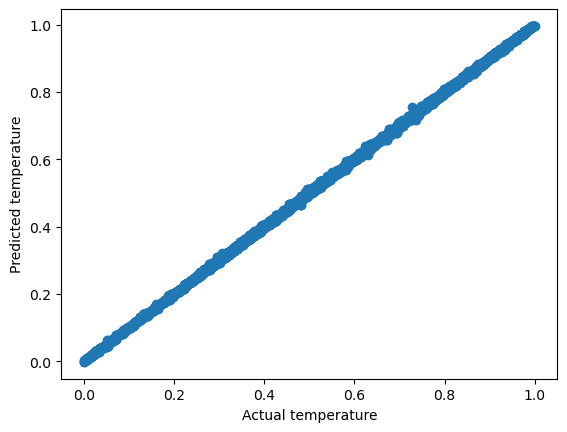

In [50]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual temperature")
plt.ylabel("Predicted temperature")
plt.show()

In [51]:
X_new = ([[0.1,0.611,0.9,0.2,0.9,0]])

In [52]:
prediction = model.predict(X_new)

In [53]:
print(prediction)

[0.17709473]


2.Decision Tree Regressor

In [54]:
model_2=DecisionTreeRegressor()

In [55]:
model_2.fit(X_train,Y_train)

DecisionTreeRegressor()

Evaluation

In [56]:
#accuracy for prediction on training data
training_data_prediction_2 = model_2.predict(X_train)

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#R squared error
score2_1 = metrics.r2_score(Y_train,training_data_prediction_2)

#Mean absolute error
score2_2 = metrics.mean_squared_error(Y_train, training_data_prediction_2)
print("R squared error : ",score2_1)
print("Mean squared error : ",score2_2)

R squared error :  0.9999999976017613
Mean squared error :  7.070033602384242e-11


Visualizing the actual temperature and predicted temperature

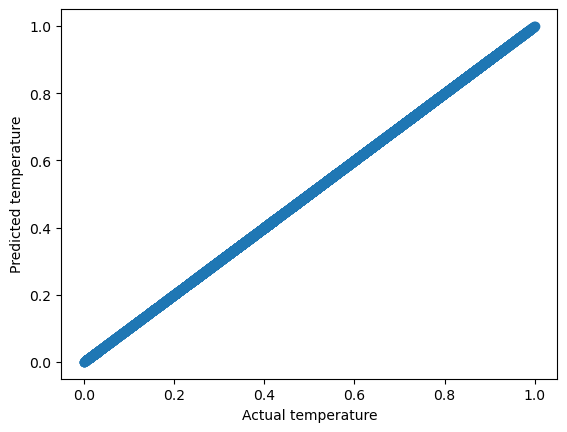

In [77]:
plt.scatter(Y_train,training_data_prediction_2)
plt.xlabel("Actual temperature")
plt.ylabel("Predicted temperature")
plt.show()

Random Forest Regression

In [59]:
model_3 = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [60]:
model_3.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [61]:
#accuracy for prediction on training data
training_data_prediction_3 = model_3.predict(X_train)

In [62]:
from sklearn.metrics import mean_squared_error
#R squared error
score3_1 = metrics.r2_score(Y_train,training_data_prediction_3)

#Mean absolute error
score3_2 = metrics.mean_squared_error(Y_train, training_data_prediction_3)
print("R squared error : ",score3_1)
print("Mean squared error : ",score3_2)

R squared error :  0.9999913110188875
Mean squared error :  2.561521023412148e-07


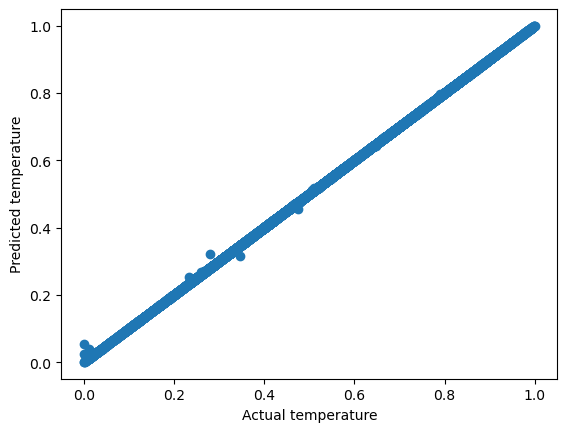

In [78]:
plt.scatter(Y_train,training_data_prediction_3)
plt.xlabel("Actual temperature")
plt.ylabel("Predicted temperature")
plt.show()

In [ ]:
model_4= LinearRegression()

In [65]:
model_4.fit(X_train,Y_train)

LinearRegression()

In [66]:
#accuracy for prediction on training data
training_data_prediction_4 = model_4.predict(X_train)

In [67]:
from sklearn.metrics import mean_squared_error
#R squared error
score4_1 = metrics.r2_score(Y_train,training_data_prediction_4)

#Mean absolute error
score4_2 = metrics.mean_squared_error(Y_train, training_data_prediction_4)
print("R squared error : ",score4_1)
print("Mean squared error : ",score4_2)

R squared error :  0.8049730865365143
Mean squared error :  0.005749414488268585


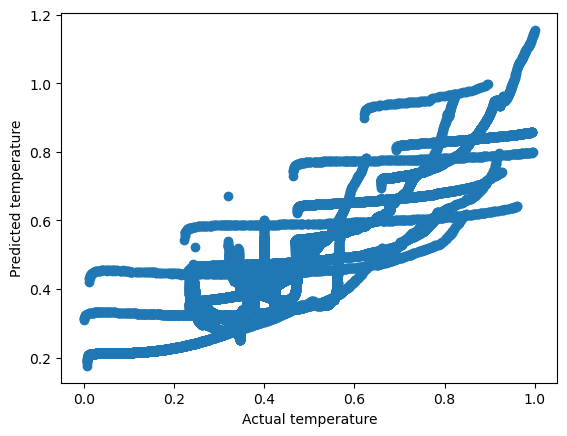

In [82]:
plt.scatter(Y_train,training_data_prediction_4)
plt.xlabel("Actual temperature")
plt.ylabel("Predicted temperature")
plt.show()

In [90]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# Define the GridSearchCV
grid_search = GridSearchCV(estimator=model_3, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
